**I started by importing most of the librabries that would be used in this project.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Here i imported my dataset and took the head of five

In [32]:
data = pd.read_csv('/content/cereal.csv')
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


I also took the tail of (5)

In [33]:
data.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


I renamed some columns

In [34]:
data.rename(columns={'mfr': 'Manufacturer'}, inplace=True)

In [35]:
data['Manufacturer'] = data['Manufacturer'].replace({'A': 'American Home Food Products', 'G': 'General Mills', 'K': 'Kelloggs', 'N': 'Nabisco', 'P': 'Post', 'Q': 'Quaker Oats', 'R': 'Ralston Purina'})

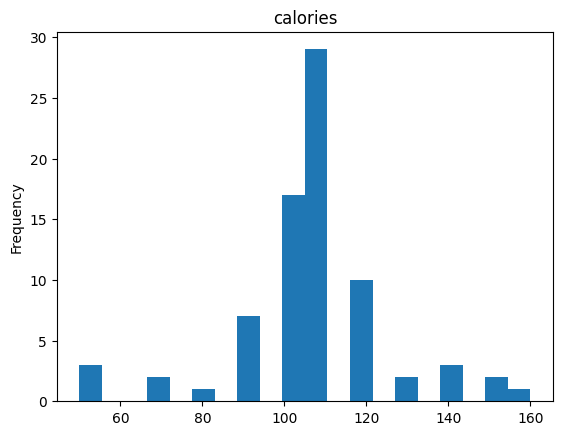

In [36]:
# @title calories

from matplotlib import pyplot as plt
data['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.show()

**The distribution of calories in our dataset exhibits a normal distribution, characterized by a bell-shaped curve. Most cereals in our dataset provide around 100-120 calories per serving.**

Data Exploration

In [37]:
data.shape

(77, 16)

In [38]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [39]:
data.isnull().sum() / data.shape[0] * 100

,0
name,0.0
Manufacturer,0.0
type,0.0
calories,0.0
protein,0.0
fat,0.0
sodium,0.0
fiber,0.0
carbo,0.0
sugars,0.0


In [40]:
data.duplicated().sum()

0

In [41]:
(data == -1).sum()

,0
name,0
Manufacturer,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,1
sugars,1


In [42]:
data = data.replace(-1, np.nan)

In [43]:
for col in ['carbo', 'sugars', 'potass']:
  data[col]= data[col].fillna(data[col].mean())


In [44]:
data.isnull().sum()

,0
name,0
Manufacturer,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [45]:
data.select_dtypes(include='object').columns

Index(['name', 'Manufacturer', 'type'], dtype='object')

In [46]:
data.select_dtypes(include='number').columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [47]:
data.calories.value_counts()

,count
calories,
110,29
100,17
120,10
90,7
50,3
140,3
70,2
130,2
150,2


In [48]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881534,4.349754,69.478004,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.802632,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


**Data Analysis**

This chart shows that Mueslix Crispy Blend(160%) has the highest calories while All-Bran with Extra Fiber(50%), Puffed Rice(50%), Puffed Wheat(50%) has the lowest calories

In [49]:
px.bar(data.groupby('name')['calories'].mean())

Looking at the products that has sugar and carbohydrate more

In [50]:
px.bar(data.groupby('name')[['sugars', 'carbo']].mean())

In [51]:
px.bar(data.groupby('Manufacturer')[['potass', 'sodium', 'carbo', 'fiber']].mean())

This chart shows that General Mills has the highest Sodium, American Home food products don't have sodium and fiber at all, Nabisco has the highest Potass and also the highest fiber, and Ralson Purina has the highest carbo, Quaker oats has the lowest Potass and lowest carbo.


In [52]:
(data.groupby('Manufacturer')['rating'].mean())

,rating
Manufacturer,
American Home Food Products,54.850917
General Mills,34.485852
Kelloggs,44.038462
Nabisco,67.968567
Post,41.705744
Quaker Oats,42.915990
Ralston Purina,41.542997


The Top three highest rating are Nabisco(67%), American Home Foods(54%), Kellogs(44%)  

In [53]:
(data.groupby('name')['rating'].mean())

,rating
name,
100% Bran,68.402973
100% Natural Bran,33.983679
All-Bran,59.425505
All-Bran with Extra Fiber,93.704912
Almond Delight,34.384843
...,...
Triples,39.106174
Trix,27.753301
Wheat Chex,49.787445


In [54]:
px.bar(data, x='name', y='rating', title = 'Brand vs rating')

# The above chart shows the top Five Brand that has the highest Rating namely:
1st All-Bran with Extra Fiber,
2nd Shredded wheat 'n' Bran,
3rd Shredded wheat spoon size,
4th 100% Bran,
5th Shredded wheat...

In [55]:
px.pie(data, values='weight', names='Manufacturer')

Kelloggs has the highest weight, next to General Mills

In [56]:
col = ['calories', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

Analyzing the relationship between the nutritional columns

In [57]:
data[col].corr()

,calories,fat,sodium,fiber,carbo,sugars,potass
calories,1.000000,0.498610,0.300649,-0.293413,0.257423,0.566062,-0.071991
fat,0.498610,1.000000,-0.005407,0.016719,-0.298074,0.300552,0.197823
sodium,0.300649,-0.005407,1.000000,-0.070675,0.290399,0.057425,-0.042312
fiber,-0.293413,0.016719,-0.070675,1.000000,-0.380223,-0.138711,0.908647
carbo,0.257423,-0.298074,0.290399,-0.380223,1.000000,-0.471184,-0.358557
sugars,0.566062,0.300552,0.057425,-0.138711,-0.471184,1.000000,0.001348
potass,-0.071991,0.197823,-0.042312,0.908647,-0.358557,0.001348,1.000000


**Determine the average rating of cereals placed on each shelf (1, 2, or 3).**

In [58]:
data.shelf.value_counts()

,count
shelf,
3,36
2,21
1,20


In [59]:
for sh in data.shelf.unique().tolist():
    print(f'Average rating for shelf {sh}: {data[data.shelf==sh].rating.mean()}')

Average rating for shelf 3: 45.220032
Average rating for shelf 1: 46.14543875
Average rating for shelf 2: 34.97282652380953
